![Mapa del Análisis Territorial](../img/mapa.png)

# **Un viaje por el gasto turístico en Canarias**

#  **`1- INTRODUCCIÓN`**

Canarias es uno de los destinos turísticos más importantes de Europa, y podríamos decir que tiene un superpoder muy particular: el clima es una primavera eterna. Mientras en buena parte del continente se pelea con la lluvia y el frío, en Canarias hay personas tomando el sol en pleno febrero. Para un turista europeo, eso no es solo atractivo: es casi milagroso.

Es un archipiélago con personalidad múltiple: ocho islas, ocho mundos, ocho formas diferentes de vivir unas vacaciones sin salir del mismo territorio. Y ahí está la clave del turismo canario: la diversidad.

### **¿Qué significa todo esto?**
Que Canarias no funciona como un solo destino, sino como un conjunto de modelos turísticos que conviven dentro del mismo archipiélago.
Y si las islas son diferentes, también lo es la forma en que los turistas gastan su dinero.

Por eso, más allá de saber cuántos turistas llegan, la verdadera pregunta es:

✅ ¿Cuánto gasta un turista cuando viene a Canarias?

✅ ¿En qué se lo gasta?

✅ ¿Gasta lo mismo un turista alemán que uno español o uno nórdico?

✅ ¿Y qué isla atrae a los turistas que más consumen?


# **`2- HIPÓTESIS`**

Canarias no solo es un destino turístico; es una economía viva donde cada visitante deja una huella económica distinta. Entender cómo gastan los turistas es comprender cómo se mueve el motor económico de las islas, es por esto por lo que se plantean estas cuatro hipótesis:

- **`1 Son Los turistas del norte de Europa son los que más gastan por día`**

  Viajan desde países con mayor poder adquisitivo, se alojan en establecimientos más caros y consumen más en ocio, restauración y actividades, verdad o mito?

- **`2 La mayor parte del gasto turístico se concentra en el alojamiento.`**

  Los hoteles, apartamentos y viviendas vacacionales representan el núcleo principal del presupuesto total del viaje.¿Cierto?

- **`3 Tenerife es la isla donde más dinero se gasta.`**

  Porque tiene más infraestructuras turísticas, más oferta de ocio, más actividades y mayor capacidad hotelera.

- **`4 Tras la pandemia, el gasto medio por turista se ha recuperado e incluso aumentado.`**

  Menos viajes al año, pero viajes más largos, con más comodidad y más disposición a gastar.

# **`3- FUENTE DE LOS DATOS`**

Para este proyecto se han utilizado datos oficiales del **`Instituto Canario de Estadística (ISTAC)`**. La información procede de la tabla estadística “Gasto por turista y día”, correspondiente a los gastos medios desglosados por categorías (alojamiento, transporte, alimentación, ocio, compras, entre otros) y por países de residencia (España, Alemania, Reino Unido, Países Bajos, Países Nórdicos y otras nacionalidades).

Los datos abarcan las islas de Tenerife, Gran Canaria, Lanzarote, Fuerteventura, La Palma y el total del archipiélago, y están organizados por periodos trimestrales y periodos anuales. 

Fuente: Instituto Canario de Estadística (ISTAC). Dataset “Gasto por turista y día”. 

Última actualización: 12 de agosto de 2025. 

Titular de derechos: Instituto Canario de Estadística (ISTAC). Copyright 2025.

# **`4- LIMPIEZA DE LOS DATOS`**

Este proceso tiene como objetivo garantizar la coherencia, calidad y comparabilidad de las series analizadas. Para ello, han revisado formatos, se han unificado estructuras y series temporales, se eliminaron duplicados, se normalizaron las categorías de gasto y nacionalidades. Además, se realizó una verificación de rangos y consistencia temporal, asegurando que las series fueran fiables para su posterior análisis descriptivo y visualización. El conjunto de datos carecía de datos nulos.

Los datos originales descargados desde el ISTAC incluyen información detallada sobre:

 - Tipo de gasto
 - Territorio
 - Pais de procedencia
 - Importe total del gasto medio diario por turista en el periodo indicado
 
Sin embargo, antes de realizar cualquier análisis estadístico o modelización, es necesario aplicar un proceso de limpieza y preparación de los datos.

También se ha tenido en cuenta el impacto de la COVID-19: en el segundo trimestre de 2020 el turismo estuvo prácticamente paralizado, por lo que la totalidad de los valores aparecen a cero en ese periodo. No se trata de un error, sino de un comportamiento real de la serie, y se mantiene para no distorsionar el análisis histórico.

In [2]:
# Se importan las librerias necesarias para el desarrollo de este análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leemos los datos del csv con los datos recopilados por el ISTAC para el análisis
df = pd.read_csv("../data/gastoxturistaxdia.csv")  
df.head()

,TIPO DE GASTO,TERRITORIO,PAIS PROCEDENCIA,2025 2T,2025 1T,2024,2024 4T,2024 3T,2024 2T,2024 1T,...,2019,2019 4T,2019 3T,2019 2T,2019 1T,2018,2018 4T,2018 3T,2018 2T,2018 1T
0,Total,Canarias,Total,157.94,180.97,177.56,176.07,187.29,166.84,179.51,...,137.45,145.47,146.08,138.57,121.04,142.45,148.10,149.46,138.86,133.59
1,Total,Canarias,España (excluida Canarias),142.50,159.38,153.13,154.94,161.24,140.66,154.39,...,130.77,132.90,135.91,139.78,110.43,135.02,136.57,141.26,133.84,124.73
2,Total,Canarias,Alemania,145.60,169.19,171.89,167.86,182.18,153.20,181.83,...,130.15,135.60,139.59,129.11,119.19,135.70,140.64,137.96,134.35,129.81
3,Total,Canarias,Países Bajos,162.73,176.14,177.92,175.41,187.27,183.67,167.44,...,131.67,143.40,137.47,125.24,119.42,134.95,139.36,139.84,140.89,121.63
4,Total,Canarias,Países Nórdicos,168.86,183.16,183.76,196.86,172.52,146.90,180.90,...,152.05,163.97,138.79,165.35,140.65,155.32,164.58,139.56,158.88,149.64


In [4]:
# Se revisan los datos importados en el dataframe para determinar las 
# depuraciones de datos a realizar:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIPO DE GASTO     504 non-null    object 
 1   TERRITORIO        504 non-null    object 
 2   PAIS PROCEDENCIA  504 non-null    object 
 3   2025 2T           504 non-null    float64
 4   2025 1T           504 non-null    float64
 5   2024              504 non-null    float64
 6   2024 4T           504 non-null    float64
 7   2024 3T           504 non-null    float64
 8   2024 2T           504 non-null    float64
 9   2024 1T           504 non-null    float64
 10  2023              504 non-null    float64
 11  2023 4T           504 non-null    float64
 12  2023 3T           504 non-null    float64
 13  2023 2T           504 non-null    float64
 14  2023 1T           504 non-null    float64
 15  2022              504 non-null    float64
 16  2022 4T           504 non-null    float64
 1

Las estimaciones del tercer y cuarto trimestre de 2025 se obtienen tomando el promedio histórico de esos trimestres de la serie temporal en estudio(2018–2024). 

**El análisis para determinar las distintas hipótesis planteadas se realizará a nivel anual para garantizar la comparabilidad entre períodos**, usando una metodología sencilla sin modelos estadísticos complejos.

Esta metodología permite obtener una aproximación coherente con el comportamiento histórico del gasto medio diario de los turistas en Canarias.

In [5]:
# Se renombra las tres primeras columnas para dar agilidad a las visulizaciones
df = df.rename(columns={
    df.columns[0]: 'gasto',
    df.columns[1]: 'territorio',
    df.columns[2]: 'procedencia'
})

In [6]:
# Detectar automáticamente las columnas que contienen "3T" o "4T"
cols_3T = [col for col in df.columns if "3T" in col]
cols_4T = [col for col in df.columns if "4T" in col]


# Calcular los promedios y redondear
prom_3T = df[cols_3T].mean(axis=1).round(2)
prom_4T = df[cols_4T].mean(axis=1).round(2)

# Eliminar columnas si ya existen para evitar errores
for col in ["2025 3T", "2025 4T"]: 
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Insertar en la posición que le pertenece en la serie temporal cuarta y 
# quinta columna (después del índice)
df.insert(4, "2025 3T", prom_3T)  # posición 3 → cuarta columna
df.insert(3, "2025 4T", prom_4T)  # posición 4 → quinta columna

# Revisar
df.head()

,gasto,territorio,procedencia,2025 4T,2025 2T,2025 3T,2025 1T,2024,2024 4T,2024 3T,...,2019,2019 4T,2019 3T,2019 2T,2019 1T,2018,2018 4T,2018 3T,2018 2T,2018 1T
0,Total,Canarias,Total,154.31,157.94,155.41,180.97,177.56,176.07,187.29,...,137.45,145.47,146.08,138.57,121.04,142.45,148.10,149.46,138.86,133.59
1,Total,Canarias,España (excluida Canarias),134.54,142.50,139.52,159.38,153.13,154.94,161.24,...,130.77,132.90,135.91,139.78,110.43,135.02,136.57,141.26,133.84,124.73
2,Total,Canarias,Alemania,151.99,145.60,151.83,169.19,171.89,167.86,182.18,...,130.15,135.60,139.59,129.11,119.19,135.70,140.64,137.96,134.35,129.81
3,Total,Canarias,Países Bajos,148.26,162.73,155.54,176.14,177.92,175.41,187.27,...,131.67,143.40,137.47,125.24,119.42,134.95,139.36,139.84,140.89,121.63
4,Total,Canarias,Países Nórdicos,172.56,168.86,148.92,183.16,183.76,196.86,172.52,...,152.05,163.97,138.79,165.35,140.65,155.32,164.58,139.56,158.88,149.64


In [7]:
# Eliminar columnas antiguas que puedan existir
for col in ["2025", "Promedio 2025"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Calcular promedio de las columnas que se necesitan (3,4,5,6)
prom_2025 = df.iloc[:, 3:7].mean(axis=1).round(2)

# Insertar la nueva columna en la posición deseada (cuarta columna)
df.insert(3, "2025", prom_2025)

# Revisar resultado
df.head()


,gasto,territorio,procedencia,2025,2025 4T,2025 2T,2025 3T,2025 1T,2024,2024 4T,...,2019,2019 4T,2019 3T,2019 2T,2019 1T,2018,2018 4T,2018 3T,2018 2T,2018 1T
0,Total,Canarias,Total,162.16,154.31,157.94,155.41,180.97,177.56,176.07,...,137.45,145.47,146.08,138.57,121.04,142.45,148.10,149.46,138.86,133.59
1,Total,Canarias,España (excluida Canarias),143.98,134.54,142.50,139.52,159.38,153.13,154.94,...,130.77,132.90,135.91,139.78,110.43,135.02,136.57,141.26,133.84,124.73
2,Total,Canarias,Alemania,154.65,151.99,145.60,151.83,169.19,171.89,167.86,...,130.15,135.60,139.59,129.11,119.19,135.70,140.64,137.96,134.35,129.81
3,Total,Canarias,Países Bajos,160.67,148.26,162.73,155.54,176.14,177.92,175.41,...,131.67,143.40,137.47,125.24,119.42,134.95,139.36,139.84,140.89,121.63
4,Total,Canarias,Países Nórdicos,168.38,172.56,168.86,148.92,183.16,183.76,196.86,...,152.05,163.97,138.79,165.35,140.65,155.32,164.58,139.56,158.88,149.64


In [8]:
# Columnas fijas que siempre se mantienen
columnas_fijas = ['gasto', 'territorio', 'procedencia']

# Columnas de los años en estudio
años = ['2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018']

# Filtrar usando .loc: todas las filas (:) y solo las columnas deseadas
df_final = df.loc[:, columnas_fijas + [col for col in df.columns if col in años]]

# Revisar resultado
df_final.head(10)

,gasto,territorio,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
0,Total,Canarias,Total,162.16,177.56,168.87,160.53,143.05,135.31,137.45,142.45
1,Total,Canarias,España (excluida Canarias),143.98,153.13,143.68,139.09,123.31,119.33,130.77,135.02
2,Total,Canarias,Alemania,154.65,171.89,164.57,153.37,148.35,131.75,130.15,135.70
3,Total,Canarias,Países Bajos,160.67,177.92,170.93,168.62,147.18,134.89,131.67,134.95
4,Total,Canarias,Países Nórdicos,168.38,183.76,182.03,184.89,172.43,158.48,152.05,155.32
5,Total,Canarias,Reino Unido,172.22,191.38,176.40,170.18,151.42,137.26,140.96,146.92
6,Total,Canarias,Otro,160.16,171.58,169.11,154.60,141.44,137.32,136.90,141.58
7,Total,Lanzarote,Total,163.53,178.55,168.55,160.70,140.02,138.56,134.01,144.39
8,Total,Lanzarote,España (excluida Canarias),150.29,165.36,156.96,142.87,125.45,119.43,133.98,155.61
9,Total,Lanzarote,Alemania,152.69,177.81,161.42,160.29,136.21,137.53,128.30,144.39


Una vez obtenidos los valores de gasto medio de los turistas por día en series temporales anuales, se procede a revisar las distintas partidas que se desglosan en la columna gastos, se detecta que hay datos duplicados.

Acudiendo a la fuente, según la clasificación del ISTAC, en el concepto “Alojamiento” se incluyen incluye el gasto principal en alojamiento y servicios auxiliares procediendo a duplicar esos valores. Como no se ha podido identificar qué tipo de gasto se asignan en esas partidas, **se utiliza únicamente el importe total de “Alojamiento”** y se eliminan las filas correspondientes a ambas subpartidas.

De manera similar, **“Alimentación”** agrupa el gasto en supermercados y en restaurantes, cafeterías o similares; para evitar duplicidades, **se eliminaron las filas asociadas a este concepto.**

Estas depuraciones aseguran la coherencia y consistencia de los datos utilizados en el análisis.

In [9]:
# Para eliminar de la columna gasto todas las filas de las partidas duplicadas
eliminar = ["alimentación", "servicios auxiliares", "gasto principal del alojamiento"]

# de df_final, selecciona la columna gasto, limpia si hay espacios, convierte a 
# minúsculas y además revisa si el valor está en la lista, niega la condición 
# (lo contrario) y guarda solo las filas que cumplen

df_final_filtrado = df_final[
    ~df_final['gasto'].str.strip().str.lower().isin(map(str.lower, eliminar))]



In [10]:
df_final_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 503
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gasto        378 non-null    object 
 1   territorio   378 non-null    object 
 2   procedencia  378 non-null    object 
 3   2025         378 non-null    float64
 4   2024         378 non-null    float64
 5   2023         378 non-null    float64
 6   2022         378 non-null    float64
 7   2021         378 non-null    float64
 8   2020         378 non-null    float64
 9   2019         378 non-null    float64
 10  2018         378 non-null    float64
dtypes: float64(8), object(3)
memory usage: 35.4+ KB


# **`5- ANÁLISIS DE LOS DATOS`**

##### **5.1 ANÁLISIS PARA VERIFICACIÓN HIPÓTESIS 1**

Con el fin de `verificar la hipótesis 1`, según la cual los turistas del norte de Europa presentan el mayor gasto diario, se analizarán los datos de gasto total en Canarias, prestando especial atención a la distribución del gasto por nacionalidad para determinar si este grupo de turistas efectivamente lidera el gasto.

In [11]:
# Normalizar columnas: quitar espacios al inicio/final y convertir a minúsculas
df['gasto'] = df['gasto'].str.strip().str.lower()
df['territorio'] = df['territorio'].str.strip().str.lower()
df['procedencia'] = df['procedencia'].str.strip().str.lower()

# Valores a filtrar también en minúsculas
gasto_valor = 'total'
territorio_valor = 'canarias'
procedencias = ['españa (excluida canarias)', 'alemania', 'países bajos',
                'países nórdicos', 'reino unido', 'otros']

# Filtrar filas
df_procedencias = df[
    (df['gasto'] == gasto_valor) &
    (df['territorio'] == territorio_valor) &
    (df['procedencia'].isin(procedencias))
]

# Seleccionar columnas finales: gasto, territorio, procedencia y años
años = ['2025','2024','2023','2022','2021','2020','2019','2018']
columnas_finales = ['gasto', 'territorio', 'procedencia'] + [col for col in df.columns if col in años]
df_tt_proc = df_procedencias[columnas_finales]

# Revisar resultado
df_tt_proc.head()

,gasto,territorio,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
1,total,canarias,españa (excluida canarias),143.98,153.13,143.68,139.09,123.31,119.33,130.77,135.02
2,total,canarias,alemania,154.65,171.89,164.57,153.37,148.35,131.75,130.15,135.70
3,total,canarias,países bajos,160.67,177.92,170.93,168.62,147.18,134.89,131.67,134.95
4,total,canarias,países nórdicos,168.38,183.76,182.03,184.89,172.43,158.48,152.05,155.32
5,total,canarias,reino unido,172.22,191.38,176.40,170.18,151.42,137.26,140.96,146.92


In [12]:
# Lista de años que quiero mantener, para visulización más ágil
años = ['2025','2024','2023','2022','2021','2020','2019','2018']

# Crear nuevo DataFrame solo con 'procedencia' y los años
df_procedencia_años = df_tt_proc[['procedencia'] + [col for col in df_final.columns if col in años]]

# Revisar resultado
df_procedencia_años.head()

,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
1,españa (excluida canarias),143.98,153.13,143.68,139.09,123.31,119.33,130.77,135.02
2,alemania,154.65,171.89,164.57,153.37,148.35,131.75,130.15,135.70
3,países bajos,160.67,177.92,170.93,168.62,147.18,134.89,131.67,134.95
4,países nórdicos,168.38,183.76,182.03,184.89,172.43,158.48,152.05,155.32
5,reino unido,172.22,191.38,176.40,170.18,151.42,137.26,140.96,146.92


In [13]:
años = ['2025','2024','2023','2022','2021','2020','2019','2018']

# Asegurarnos de que procedencia es el índice
df_indexed = df_procedencia_años.set_index('procedencia')[años]

# Procedencia y valor máximo por año
h1 = pd.DataFrame({
    'Año': años,
    'Procedencia': df_indexed.idxmax(),
    'Valor_max': df_indexed.max()
}).reset_index(drop=True)

h1

,Año,Procedencia,Valor_max
0,2025,reino unido,172.22
1,2024,reino unido,191.38
2,2023,países nórdicos,182.03
3,2022,países nórdicos,184.89
4,2021,países nórdicos,172.43
5,2020,países nórdicos,158.48
6,2019,países nórdicos,152.05
7,2018,países nórdicos,155.32


##### **5.2 ANÁLISIS PARA VERIFICACIÓN HIPÓTESIS 2**

La `hipótesis 2` plantea que la mayor parte del gasto diario de un turista en Canarias se destina al alojamiento. Para contrastarlo, se analizará el porcentaje del gasto total diario correspondiente a este concepto.


In [14]:
df_comprobacion_h2 = df_final_filtrado[
    (df_final_filtrado['gasto'].str.lower() != "total") &
    (df_final_filtrado['territorio'].str.lower() == "canarias") &
    (df_final_filtrado['procedencia'].str.lower() == "total")
]

In [15]:
# para que el indice se ponga a 0
df_comprobacion_h2 = df_comprobacion_h2.reset_index(drop=True)

Para facilitar la interpretación de la Hipótesis 2, los datos de gasto se han expresado en porcentajes. Esto permite comparar de manera clara la proporción que representa cada tipo de gasto en el total anual y visualizar tendencias a lo largo de los años.

In [16]:
# Se extraen los datos de todos los años en estudio
cols_anios = ['2025','2024','2023','2022','2021','2020','2019','2018']
# para calcular los porcentajes de cada tipo de gasto sobre el total
df_porcentaje_col = df_comprobacion_h2.copy()
df_porcentaje_col[cols_anios] = df_porcentaje_col[cols_anios].div(
    df_porcentaje_col[cols_anios].sum(axis=0), axis=1
) * 100
# para que redondee a dos decimales
df_porcentaje_col[cols_anios] = df_porcentaje_col[cols_anios].round(2)

df_porcentaje_col

,gasto,territorio,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
0,Alojamiento,Canarias,Total,43.77,43.41,43.60,43.69,43.72,45.07,43.03,43.31
1,Transporte nacional / internacional,Canarias,Total,27.57,28.88,28.50,27.79,25.08,26.99,29.45,29.19
2,Transporte local,Canarias,Total,6.93,6.57,7.02,7.54,8.46,6.02,5.71,5.72
3,Supermercados o similares,Canarias,Total,4.02,3.96,3.90,3.72,3.94,4.38,4.31,4.26
4,"Restaurantes, cafeterías o similares",Canarias,Total,9.98,9.66,9.43,9.75,10.21,9.62,9.01,8.89
5,Ocio,Canarias,Total,4.20,4.09,4.29,4.30,4.28,3.25,3.72,3.80
6,Compra de bienes,Canarias,Total,3.01,3.00,2.69,2.69,3.36,4.03,4.15,4.11
7,Otros gastos turísticos,Canarias,Total,0.51,0.44,0.56,0.52,0.96,0.64,0.60,0.73


##### **5.3 ANÁLISIS PARA VERIFICACIÓN HIPÓTESIS 3**

La `hipótesis 3` plantea que Tenerife es la isla dónde más dinero gasta de media al día un turista en Canarias. Para comprobarlo se analizarán los datos correspondientes a este concepto.

In [17]:
# Lista de territorios que nos interesan
territorios = ["Lanzarote", "Fuerteventura", "Gran Canaria", "Tenerife", "La Palma"]

# Filtrado del dataframe
df_final_h3 = df_final_filtrado[
    (df_final_filtrado['gasto'].str.lower() == "total") &
    (df_final_filtrado['territorio'].isin(territorios)) &
    (df_final_filtrado['procedencia'].str.lower() == "total")
].reset_index(drop=True)  # Resetea el índice para que empiece desde 0

df_final_h3

,gasto,territorio,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
0,Total,Lanzarote,Total,163.53,178.55,168.55,160.70,140.02,138.56,134.01,144.39
1,Total,Fuerteventura,Total,155.81,170.32,165.66,149.20,147.49,138.91,134.93,132.49
2,Total,Gran Canaria,Total,160.28,172.26,169.74,159.10,142.03,140.10,141.28,141.30
3,Total,Tenerife,Total,165.59,183.72,169.45,166.33,143.48,130.36,138.00,146.85
4,Total,La Palma,Total,145.14,155.05,143.80,138.08,141.06,116.36,119.48,119.26


In [18]:
# Columnas de años
cols_anios = ['2025','2024','2023','2022','2021','2020','2019','2018']

# Función para obtener isla y valor máximo por columna
df_max_por_anio = pd.DataFrame(
    [(col, df_final_h3.loc[df_final_h3[col].idxmax(), 'territorio'], df_final_h3[col].max())
     for col in cols_anios],
    columns=['Año', 'Isla', 'Valor máximo']
)

df_max_por_anio

,Año,Isla,Valor máximo
0,2025,Tenerife,165.59
1,2024,Tenerife,183.72
2,2023,Gran Canaria,169.74
3,2022,Tenerife,166.33
4,2021,Fuerteventura,147.49
5,2020,Gran Canaria,140.10
6,2019,Gran Canaria,141.28
7,2018,Tenerife,146.85


##### **5.4  ANÁLISIS PARA VERIFICACIÓN HIPÓTESIS 4**
La `hipótesis 4` asegura que tras la pandemia el gasto medio por turista en Canarias no solo se ha recuperado si no que incluso ha aumentado. Se realizan los procesos oportunos para su comprobación:



In [19]:
# Columnas de años
cols_anios = ['2025','2024','2023','2022','2021','2020','2019','2018']

# Filtrado del dataframe de la hipótesis anterior
df_final_h3 = df_final_filtrado[
    (df_final_filtrado['gasto'].str.lower() == "total") &
    (df_final_filtrado['territorio'].str.lower() == "canarias") &
    (df_final_filtrado['procedencia'].str.lower() == "total")
].reset_index(drop=True)  # resetea el índice

# solo mostrar las columnas de años más las columnas clave con los conceptos indicados
df_final_h3 = df_final_h3[['gasto','territorio','procedencia'] + cols_anios]
# lo dejo igual aunque es para la h4
df_final_h3

,gasto,territorio,procedencia,2025,2024,2023,2022,2021,2020,2019,2018
0,Total,Canarias,Total,162.16,177.56,168.87,160.53,143.05,135.31,137.45,142.45


# **`6- VISUALIZACIONES`**

##### **6.1 VISUALIZACIÓN HIPÓTESIS 1**

Se elabora un gráfico de barras donde cada columna muestra el gasto máximo anual en Canarias, indicando sobre ella la procedencia de los turistas que ha liderado ese valor y el valor numérico correspondiente. Esto permite comparar fácilmente la evolución del gasto por país d procedencia y evaluar la tendencia del turismo, aportando evidencia visual para contrastar la hipótesis planteada.

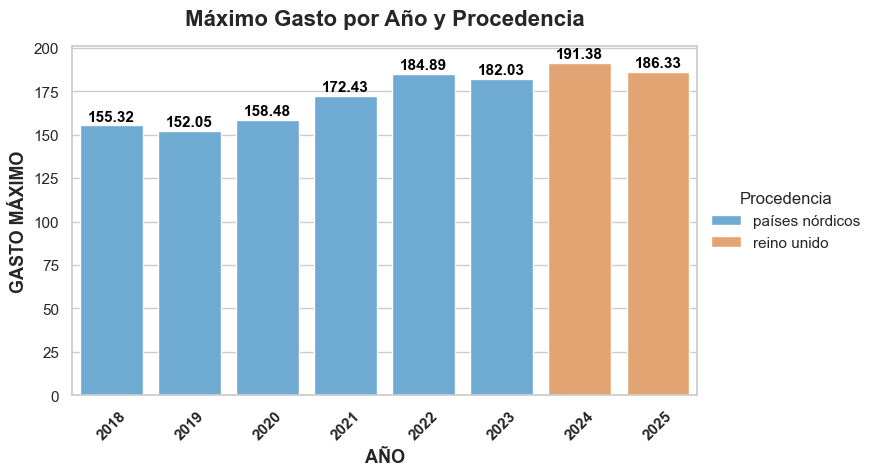

In [20]:
# Datos
data = {
    "Año": [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018],
    "Procedencia": ["reino unido", "reino unido", "países nórdicos", "países nórdicos",
                    "países nórdicos", "países nórdicos", "países nórdicos", "países nórdicos"],
    "Valor_max": [186.33, 191.38, 182.03, 184.89, 172.43, 158.48, 152.05, 155.32]
}
df = pd.DataFrame(data)

# Paleta de colores personalizada
custom_palette = {
    "reino unido": "#f4a261",       # naranja claro
    "países nórdicos": "#5dade2"    # azul suave
}

# Estilo general
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 5))

# Crear gráfico de barras
ax = sns.barplot(
    data=df,
    x="Año",
    y="Valor_max",
    hue="Procedencia",
    dodge=False,
    palette=custom_palette
)

# Títulos y etiquetas
ax.set_title("Máximo Gasto por Año y Procedencia", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("AÑO", fontsize=13, fontweight="bold")
ax.set_ylabel("GASTO MÁXIMO", fontsize=13, fontweight="bold")

# Etiquetas de valor sobre las barras (evita mostrar 0.00)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # solo muestra si hay valor
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,  # espacio sobre la barra
            f"{height:.2f}",
            ha="center", va="bottom",
            fontsize=11,
            fontweight="bold",
            color="black"
        )

# Leyenda fuera del gráfico
ax.legend(
    title="Procedencia",
    fontsize=11,
    title_fontsize=12,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Ejes y diseño
plt.xticks(rotation=45, fontsize=11, fontweight="bold")
plt.yticks(fontsize=11)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # deja espacio para la leyenda

# Mostrar gráfico
plt.show()

##### **6.2 VISUALIZACIÓN HIPÓTESIS 2**

Se ha creado un gráfico de columnas agrupadas por año, donde cada grupo de barras representa un año y las diferentes secciones (colores) corresponden a los distintos tipos de gasto. Esto permite visualizar la distribución en números relativos del gasto en Canarias, por tipo de gasto a lo largo de los años, facilitando la comparación entre categorías y la evolución temporal.

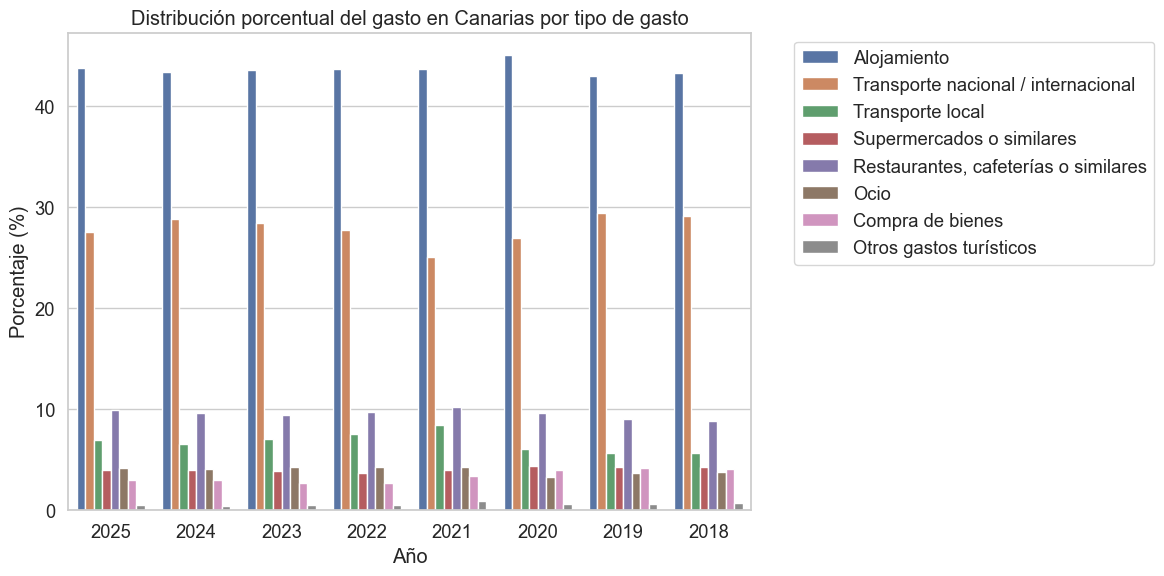

In [21]:
# Convertir a formato long
df_long = df_porcentaje_col.melt(
    id_vars=['gasto'], 
    value_vars=cols_anios, 
    var_name='Año', 
    value_name='Porcentaje'
)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='Año', y='Porcentaje', hue='gasto', data=df_long)

# Indicamos las etiquetas de los ejes y el tipo de leyenda

plt.title('Distribución porcentual del gasto en Canarias por tipo de gasto')
plt.ylabel('Porcentaje (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### **6.3 VISUALIZACIÓN HIPÓTESIS 3**

En este gráfico se muestra el valor máximo anual de gasto diario por turista en Canarias, registrado entre 2018 y 2025, identificando la isla que lo ha liderado del listado de islas analizado. El pico máximo fue 183.72 en 2024 (Tenerife). El valor es variable entre las islas, que se muestran en diferentes colores según leyenda.

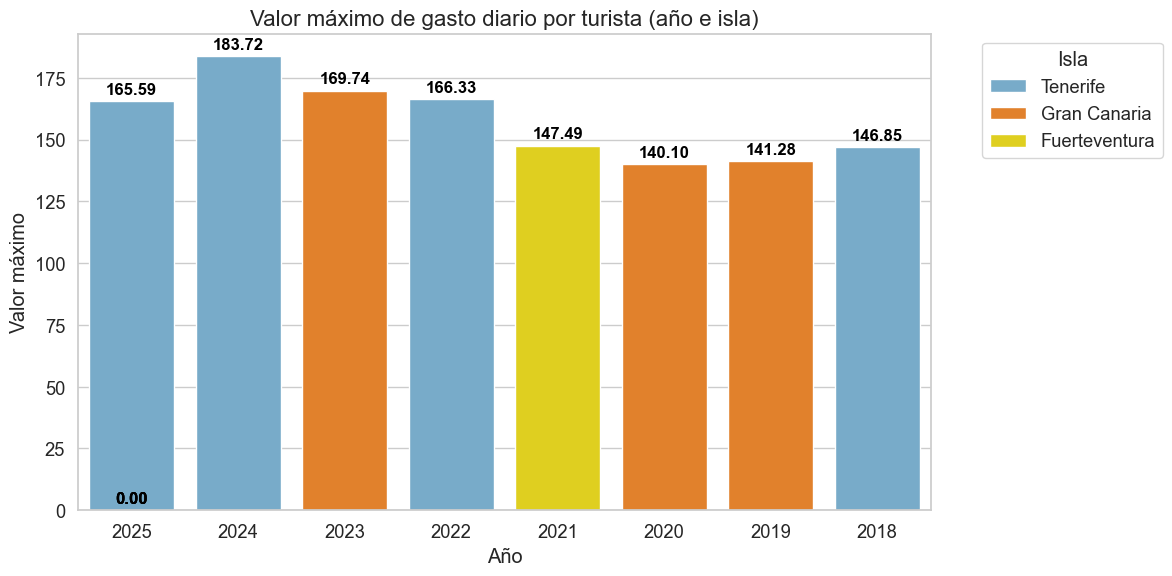

In [24]:

# Definir la paleta personalizada por isla
paleta_islas = {
    'Tenerife': '#6baed6',        # azul intenso
    'Fuerteventura': '#FFEA00',   # amarillo
    'Gran Canaria': '#ff7f0e',    # naranja
    'Lanzarote': '#a6cee3',       # gris-azulado suave
    'La Palma': '#b2df8a'         # verde suave
}

# Configuración general de Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Crear gráfico de barras
ax = sns.barplot(
    data=df_max_por_anio,
    x='Año',
    y='Valor máximo',
    hue='Isla',
    palette=paleta_islas
)

# Añadir títulos y etiquetas
plt.title('Valor máximo de gasto diario por turista (año e isla)', fontsize=16)
plt.ylabel('Valor máximo')
plt.xlabel('Año')

# Añadir valores encima de cada barra
# Añadir valores encima de cada barra, más grandes y en negrita
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}',           
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=12,        # tamaño más grande
        fontweight='bold',  # negrita
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

# Leyenda fuera del gráfico
plt.legend(title='Isla', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### **6.4 VISUALIZACIÓN HIPÓTESIS 4**

En este gráfico se visualiza la tendencia de la serie de datos del gasto diario de los turistas en Canarias en el periodo temporal estudiado, para una mejor interpretación se ha utilizado un diagrama de línea.


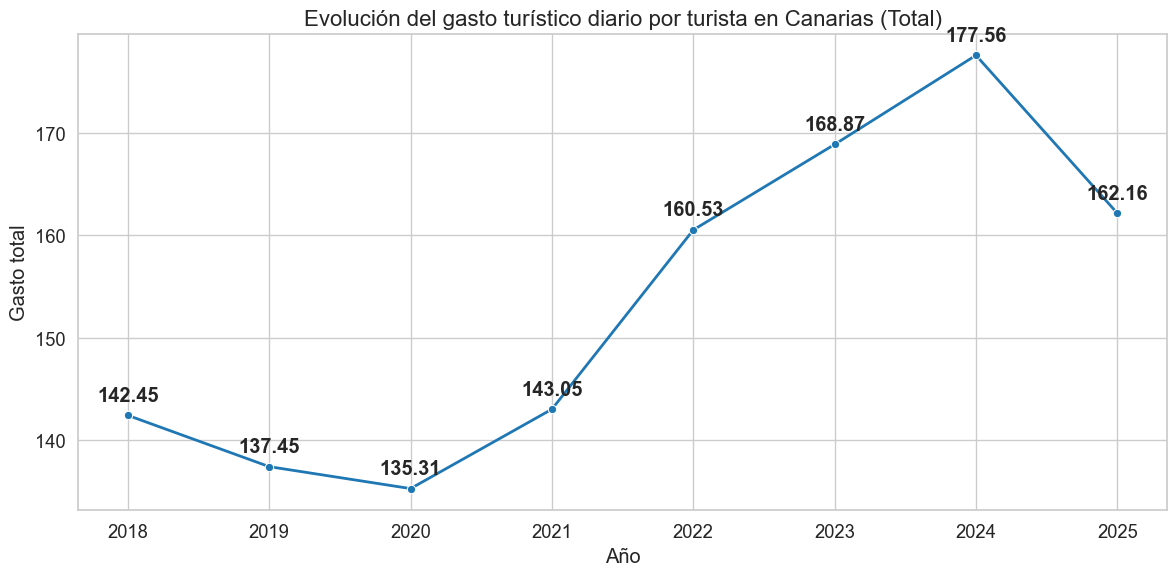

In [26]:
# Columnas de años
cols_anios = ['2018','2019','2020','2021','2022','2023','2024','2025']

# Transformar el dataframe a formato largo (long format) para Seaborn
df_long = df_final_h3.melt(
    id_vars=['gasto','territorio','procedencia'], 
    value_vars=cols_anios,
    var_name='Año',
    value_name='Valor'
)

# Configuración general
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Gráfico de línea
sns.lineplot(
    data=df_long,
    x='Año',
    y='Valor',
    marker='o',
    color='#1f77b4',  # azul
    linewidth=2
)

# Añadir títulos y etiquetas
plt.title('Evolución del gasto turístico diario por turista en Canarias (Total)', fontsize=16)
plt.ylabel('Gasto total')
plt.xlabel('Año')

# Opcional: mostrar valores encima de cada punto
for x, y in zip(df_long['Año'], df_long['Valor']):
    plt.text(x, y+1, f'{y:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# `7- CONCLUSIONES`

##### 7.1 CONCLUSIÓN HIPÓTESIS 1

**Entre 2018 y 2023, el gasto por turista y día lo han liderado los países nórdicos**, con Reino Unido al frente en 2024 y 2025. Por lo que se da por válidada la hipótesis 1 ya que de los siete años en estudio, 5 los han liderado los turistas procendentes de los países nórdicos.


##### **7.2 CONCLUSIÓN HIPÓTESIS 2**

El análisis de los datos relativos correspondientes a los tipos de gastos diarios de los turistas en Canarias, evidencia que el **alojamiento constituye la categoría con mayor gasto entre los turistas que visitan Canarias** ya que supone entorno a un 40% sobre el total de gasto diario de un turista. Esta tendencia se mantiene de manera consistente a lo largo de los años analizados, lo que permite confirmar la Hipótesis 2: la mayor parte del gasto turístico en las islas se destina al alojamiento.

##### **7.3 CONCLUSIÓN HIPÓTESIS 3**

Se observa una tendencia de valores más altos en los años recientes del gasto medio diario de un turista en Canarias, destacando el récord de 183.72 alcanzado en 2024. **Se confirma que Tenerife registra el valor máximo más alto y es la isla que más veces ha alcanzado el pico anual.**

##### **7.4 CONCLUSIÓN HIPÓTESIS 4**

El gráfico del análisis de esta hipótesis refleja las distintas fases por las que el gasto medio diario de un turista en Canarias ha alcanzado en el espacion temporal analizado:

- `Contracción (2018–2020)`: La fase descendente alcanzó su mínimo en 2020        (135.31), coincidiendo con el impacto de la pandemia.

- `**Expansión (2021–2024): Inició una recuperación robusta, culminando en el máximo histórico de 177.56 en 2024.**` Se confirma también la hipótesis planteada.

- `Retroceso (2025)`: El gasto desciende a 162.16. Es crucial notar que este valor incluye una predicción pesimista para el segundo semestre del año, lo que podría exagerar la magnitud de este retroceso.